In [71]:
from collections import Counter
import numpy as np
import scipy.stats as ss

In [4]:
import nltk as nltk
from nltk.book import text6

##So, we will be using the following text for our analysis

In [37]:
text6

<Text: Monty Python and the Holy Grail>

In [57]:
words = nltk.pos_tag(text6.tokens)

###We will define unique words as being unique and having the same tag

######Total number of words in text:

In [58]:
len(words)

16967

######Total number of unique words in text:

In [59]:
len(set(words))

2498

In [60]:
half = 16976/2

In [61]:
n=0
m=0
for c in Counter(words).most_common():
    n+=1
    m+=c[1]
    if m > half:
        break
n

45

#####So 45 words represent half of the words in the text

In [62]:
Counter(words).most_common(45)

[((u':', ':'), 1197),
 ((u'.', '.'), 816),
 ((u'!', '.'), 801),
 ((u',', ','), 731),
 ((u"'", "''"), 332),
 ((u'[', ':'), 299),
 ((u'the', 'DT'), 299),
 ((u']', ':'), 263),
 ((u'I', 'PRP'), 255),
 ((u'ARTHUR', 'NNP'), 225),
 ((u'?', '.'), 207),
 ((u'you', 'PRP'), 204),
 ((u'a', 'DT'), 188),
 ((u'of', 'IN'), 158),
 ((u'--', ':'), 148),
 ((u'to', 'TO'), 144),
 ((u'and', 'CC'), 135),
 ((u'#', '#'), 127),
 ((u'...', ':'), 118),
 ((u'Oh', 'NNP'), 110),
 ((u'it', 'PRP'), 107),
 ((u'is', 'VBZ'), 106),
 ((u'-', ':'), 88),
 ((u's', 'NNS'), 86),
 ((u'in', 'IN'), 86),
 ((u't', 'NN'), 77),
 ((u'1', 'CD'), 76),
 ((u'No', 'DT'), 76),
 ((u"'", 'POS'), 76),
 ((u'your', 'PRP$'), 75),
 ((u'not', 'RB'), 70),
 ((u'GALAHAD', 'NNP'), 69),
 ((u'What', 'WP'), 65),
 ((u'KNIGHT', 'NNP'), 65),
 ((u'FATHER', 'NNP'), 63),
 ((u'we', 'PRP'), 61),
 ((u'BEDEVERE', 'NNP'), 61),
 ((u'We', 'PRP'), 60),
 ((u'You', 'PRP'), 60),
 ((u'that', 'IN'), 60),
 ((u'this', 'DT'), 59),
 ((u's', 'VBZ'), 55),
 ((u'Well', 'NNP'), 54),
 

#####We can use FreqDist for the next part

In [66]:
freqD = nltk.FreqDist(word for (word, tag) in words)
freqD.most_common(200)

[(u':', 1197),
 (u'.', 816),
 (u'!', 801),
 (u',', 731),
 (u"'", 421),
 (u'[', 319),
 (u']', 312),
 (u'the', 299),
 (u'I', 255),
 (u'ARTHUR', 225),
 (u'?', 207),
 (u'you', 204),
 (u'a', 188),
 (u'of', 158),
 (u'--', 148),
 (u'to', 144),
 (u's', 141),
 (u'and', 135),
 (u'#', 127),
 (u'...', 118),
 (u'Oh', 110),
 (u'it', 107),
 (u'is', 106),
 (u'-', 88),
 (u'in', 86),
 (u'that', 84),
 (u't', 77),
 (u'LAUNCELOT', 76),
 (u'1', 76),
 (u'No', 76),
 (u'your', 75),
 (u'not', 70),
 (u'GALAHAD', 69),
 (u'KNIGHT', 68),
 (u'What', 65),
 (u'FATHER', 63),
 (u'we', 62),
 (u'You', 61),
 (u'BEDEVERE', 61),
 (u'We', 60),
 (u'this', 59),
 (u'no', 55),
 (u'HEAD', 54),
 (u'Well', 54),
 (u'GUARD', 53),
 (u'have', 53),
 (u'Sir', 52),
 (u'are', 52),
 (u'A', 50),
 (u'And', 50),
 (u'on', 47),
 (u'Ni', 47),
 (u'VILLAGER', 47),
 (u'me', 46),
 (u'He', 46),
 (u'boom', 45),
 (u'be', 43),
 (u'he', 43),
 (u'2', 42),
 (u'Yes', 42),
 (u'ha', 42),
 (u're', 41),
 (u'her', 40),
 (u'ROBIN', 39),
 (u'clop', 39),
 (u'my', 38)

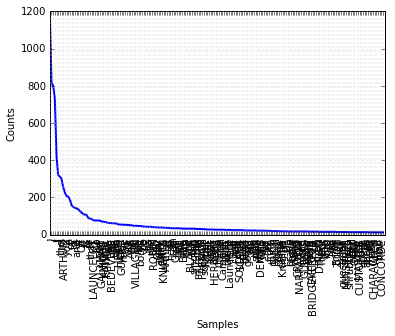

In [69]:
freqD.plot(200,cumulative=False)

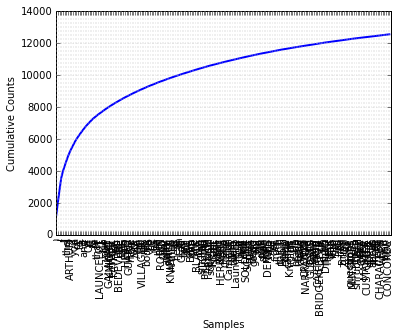

In [70]:
freqD.plot(200,cumulative=True)

###We can confirm Zipf's law by seeing if the rank correlates to the log of the count:

In [77]:
counts = [c for (w,c) in freqD.most_common()]

In [78]:
np.corrcoef(ss.rankdata(counts),[np.log(i) for i in counts])

array([[ 1.       ,  0.9051408],
       [ 0.9051408,  1.       ]])